In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cap/융합캡스톤디자인_최종데이터.csv')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# data column 나누기 (원인-결과)

y = df['target'] # 결과
X = df.drop(['target'],axis=1) # 원인

cols = X.columns
cols

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)
n_iter = 0

# StratifiedKFold loop
for train_index, test_index in skf.split(X, y):
    n_iter += 1
    if isinstance(X, pd.DataFrame):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    else:
        X_train, X_test = X[train_index], X[test_index]

    if isinstance(y, pd.Series):
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    else:
        y_train, y_test = y[train_index], y[test_index]

# Train the model
gb_clf = GradientBoostingClassifier(learning_rate = 0.07,    # 기존 모델 0.1
                                     max_depth = 1,           # 기존 모델 3
                                     min_samples_leaf = 3,    # 기존 모델 1
                                     min_samples_split = 3,   # 기존 모델 2
                                     n_estimators = 300)      # 기존 모델 100
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Print results
print(f'##################### 교차 검증 ######################## : {n_iter}')
print(f'교차 검증 정확도 : {accuracy_score(y_test, y_pred)}')
print('학습 레이블(y_train) 데이터 분포 : \n', pd.Series(y_train).value_counts())
print('검증 레이블(y_test) 데이터 분포 : \n', pd.Series(y_test).value_counts())
print('\n')

##################### 교차 검증 ######################## : 5
교차 검증 정확도 : 0.9970594412938458
학습 레이블(y_train) 데이터 분포 : 
 target
1.0    9984
0.0    9062
Name: count, dtype: int64
검증 레이블(y_test) 데이터 분포 : 
 target
1.0    2496
0.0    2265
Name: count, dtype: int64




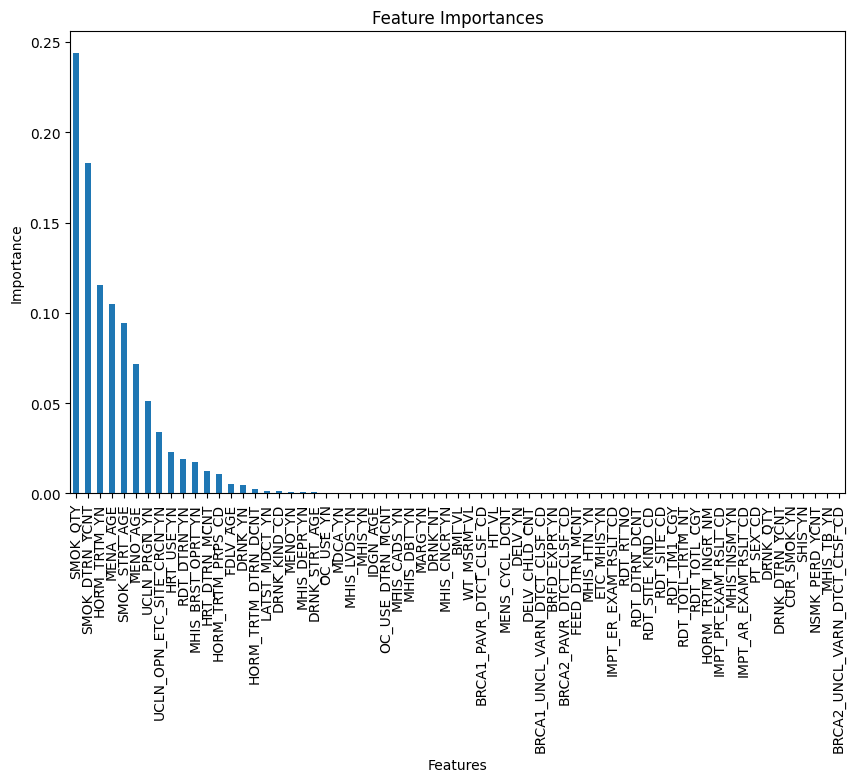

Feature Importances in Descending Order:
SMOK_QTY                        0.243587
SMOK_DTRN_YCNT                  0.182928
HORM_TRTM_YN                    0.115669
MENA_AGE                        0.105067
SMOK_STRT_AGE                   0.094139
                                  ...   
CUR_SMOK_YN                     0.000000
SHIS_YN                         0.000000
NSMK_PERD_YCNT                  0.000000
MHIS_TB_YN                      0.000000
BRCA2_UNCL_VARN_DTCT_CLSF_CD    0.000000
Length: 65, dtype: float64
Number of features with importance greater than threshold (0.01): 13

List of important features:
SMOK_QTY                     0.243587
SMOK_DTRN_YCNT               0.182928
HORM_TRTM_YN                 0.115669
MENA_AGE                     0.105067
SMOK_STRT_AGE                0.094139
MENO_AGE                     0.071854
UCLN_PRGN_YN                 0.051069
UCLN_OPN_ETC_SITE_CRCN_YN    0.033953
HRT_USE_YN                   0.022807
RDT_DTRN_YN                  0.019264
MHI

In [ ]:
import matplotlib.pyplot as plt
# 변수 중요도 추출
importances = gb_clf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# 변수 중요도 출력
print("Feature Importances in Descending Order:")
print(feature_importances)

# 임계값 설정 (예시: 중요도가 0.01보다 큰 변수들만 선택)
threshold1 = 0.01
threshold2 = 0.05

# 임계값보다 큰 변수들 선택
important_features1 = feature_importances[feature_importances > threshold1]
important_features2 = feature_importances[feature_importances > threshold2]

# 중요도가 임계값보다 큰 변수들의 개수
num_important_features1 = len(important_features1)
num_important_features2 = len(important_features2)

print("Number of features with importance greater than threshold ({}): {}".format(threshold1, num_important_features1))
print("\nList of important features:")
print(important_features1)

print("Number of features with importance greater than threshold ({}): {}".format(threshold2, num_important_features2))
print("\nList of important features:")
print(important_features2)

In [ ]:
from joblib import dump

# 모델 저장
dump(gb_clf, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']

In [ ]:
from joblib import load
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 저장된 모델 불러오기
loaded_model = load('gradient_boosting_model.joblib')

# 테스트 데이터에 대한 예측 수행
y_pred = loaded_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9970594412938458

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2265
         1.0       1.00      0.99      1.00      2496

    accuracy                           1.00      4761
   macro avg       1.00      1.00      1.00      4761
weighted avg       1.00      1.00      1.00      4761


Confusion Matrix:
[[2264    1]
 [  13 2483]]
